In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['bloomingdale', 'barentsburg', 'qaanaaq', 'marcona', 'pevek', 'ushuaia', 'rikitea', 'racale', 'yabelo', 'vaitape', 'mataura', 'speedway', 'barrow', 'chuy', 'balkanabat', 'cape town', 'coquimbo', 'kruisfontein', 'shelburne', 'bluff', 'saskylakh', 'fortuna', 'kapaa', 'albany', 'punta arenas', 'lompoc', 'esperance', 'corsicana', 'yellowknife', 'taolanaro', 'noumea', 'ust-charyshskaya pristan', 'dikson', 'georgetown', 'ketchikan', 'tabiauea', 'applewood', 'egvekinot', 'port alfred', 'atuona', 'miles city', 'pinawa', 'pailon']


In [13]:
# # Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url and request results
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
# Set temperature from response
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country =[]
city_name = []
lat = []
lng = []
index_counter = 0
set_counter = 1
# Create for loop for temperatures in city list
for city in cities:
    try:      
        response = requests.get(query_url + city).json()
        print(response)
        city_name.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter +1
        
        else:
            index_counter = index_counter + 1
            
        print(f'Processing record {index_counter} of set {set_counter} : {city}')
       
        
    except (KeyError, IndexError):
        print('City not found')
        


{'coord': {'lon': -82.2404, 'lat': 27.8936}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.89, 'feels_like': 93.61, 'temp_min': 78.22, 'temp_max': 89.15, 'pressure': 1015, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 117, 'gust': 1.99}, 'clouds': {'all': 1}, 'dt': 1627430441, 'sys': {'type': 2, 'id': 2030156, 'country': 'US', 'sunrise': 1627382941, 'sunset': 1627431701}, 'timezone': -14400, 'id': 4148207, 'name': 'Bloomingdale', 'cod': 200}
Processing record 1 of set 1 : bloomingdale
{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.01, 'feels_like': 37.54, 'temp_min': 42.01, 'temp_max': 42.01, 'pressure': 1013, 'humidity': 99, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 149, 'wind': {'speed

{'coord': {'lon': -80.2041, 'lat': 44.0787}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.94, 'feels_like': 68.68, 'temp_min': 66.65, 'temp_max': 72.73, 'pressure': 1015, 'humidity': 67, 'sea_level': 1015, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 5.17, 'deg': 20, 'gust': 9.48}, 'clouds': {'all': 55}, 'dt': 1627430112, 'sys': {'type': 2, 'id': 2038664, 'country': 'CA', 'sunrise': 1627380213, 'sunset': 1627433451}, 'timezone': -14400, 'id': 6145890, 'name': 'Shelburne', 'cod': 200}
Processing record 17 of set 1 : shelburne
{'coord': {'lon': 168.3333, 'lat': -46.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 50.02, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1012, 'humidity': 71, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 12.55, 'deg': 277, 'gust'

{'coord': {'lon': 100.3354, 'lat': 5.4112}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.55, 'feels_like': 87.17, 'temp_min': 79.95, 'temp_max': 80.55, 'pressure': 1009, 'humidity': 90}, 'visibility': 7000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1627430313, 'sys': {'type': 1, 'id': 9429, 'country': 'MY', 'sunrise': 1627427642, 'sunset': 1627472163}, 'timezone': 28800, 'id': 1735106, 'name': 'George Town', 'cod': 200}
Processing record 31 of set 1 : georgetown
{'coord': {'lon': -131.6461, 'lat': 55.3422}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 62.62, 'feels_like': 61.83, 'temp_min': 62.62, 'temp_max': 62.62, 'pressure': 1021, 'humidity': 69, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 4.41, 'deg': 195, 'gust': 5.55}, 'rain': {'1h': 0.15}, 'clouds': {'all': 50}, 'dt

In [14]:
city_dict = {'Cities': city_name,
                          'Latitude': lat,
                          'Longitude': lng,
                          'Max Temperature': max_temp,
                          'Humidity': humidity,
                          'Cloudiness': cloudiness,
                          'Wind Speed': wind_speed,
                          'Country': country,
                          'Date': date}
for k,v in city_dict.items():
    print(k,len(v))




cities_df = pd.DataFrame(city_dict)
cities_df

Cities 39
Latitude 39
Longitude 39
Max Temperature 39
Humidity 39
Cloudiness 39
Wind Speed 39
Country 39
Date 39


,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bloomingdale,27.8936,-82.2404,89.15,88,1,1.01,US,1627430441
1,Qaanaaq,77.4840,-69.3632,42.01,99,100,7.02,GL,1627430311
2,Pevek,69.7008,170.3133,35.47,92,100,9.51,RU,1627430345
3,Ushuaia,-54.8000,-68.3000,37.06,93,90,5.75,AR,1627430392
4,Rikitea,-23.1203,-134.9692,74.53,78,100,13.35,PF,1627430299
5,Racale,39.9631,18.0938,80.83,73,0,4.05,IT,1627430442
6,Yabēlo,4.8833,38.0833,59.86,67,98,10.22,ET,1627430442
7,Vaitape,-16.5167,-151.7500,78.15,73,22,7.16,PF,1627430737
8,Mataura,-46.1927,168.8643,51.48,77,51,0.78,NZ,1627430391
9,Speedway,39.8023,-86.2672,86.02,62,1,1.01,US,1627430442


In [126]:
cities_df.to_csv("../cities_output_student.csv", encoding="utf-8", index=False) 

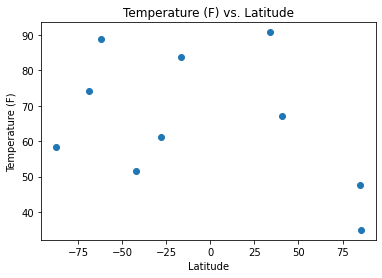

In [102]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Max Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature (F) vs. Latitude')
plt.savefig("Temperature.png")

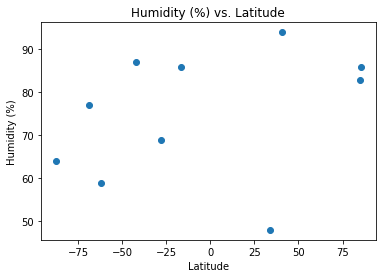

In [103]:
# Humidity (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude')
plt.savefig("Humidity.png")

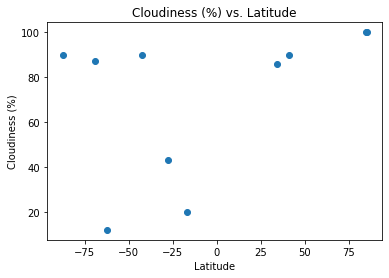

In [104]:
# Cloudiness (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude')
plt.savefig("Cloudiness.png")

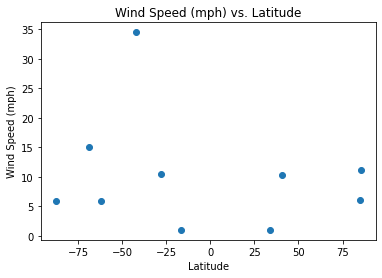

In [105]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude')
plt.savefig("Wind Speed.png")

In [106]:
# # Create Northern Hemisphere dataframe
northern_hem_df = cities_df.loc[cities_df['Latitude'].astype(float) < 0, :]
northern_hem_df

,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
4,georgetown,-16.803625,-21.767827,83.89,86,20,1.01,MY,1627410529
5,mount gambier,-42.454143,135.116529,51.71,87,90,34.52,AU,1627410530
6,beloha,-27.777236,41.570647,61.25,69,43,10.42,MG,1627410530
7,rikitea,-69.061357,-122.763358,74.19,77,87,15.01,PF,1627410505
8,hobart,-87.494113,134.737094,58.26,64,90,5.99,AU,1627410489
9,albany,-62.112057,121.121811,88.81,59,12,5.84,US,1627410249


In [107]:
# Create Southern Hemisphere dataframe
southern_hem_df = cities_df.loc[cities_df['Latitude'].astype(float) > 0, :]
southern_hem_df

,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,84.768401,-45.283934,47.64,83,100,6.11,GL,1627410528
1,torbay,40.905611,-44.072038,67.15,94,90,10.36,CA,1627410528
2,saint george,34.069267,-51.900520,90.79,48,86,1.01,US,1627410529
3,chokurdakh,85.213166,147.489318,34.95,86,100,11.10,RU,1627410370


Text(0.5, 1.0, 'Northern Hemisphere Max Temperature (F) vs Latitude')

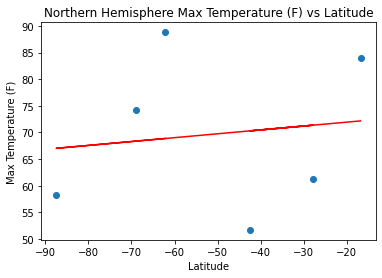

In [108]:
# Northern Hemisphere Max Temp vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Max Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere Max Temperature (F) vs Latitude')

Text(0.5, 1.0, 'Southern Hemisphere Max Temperature (F) vs Latitude')

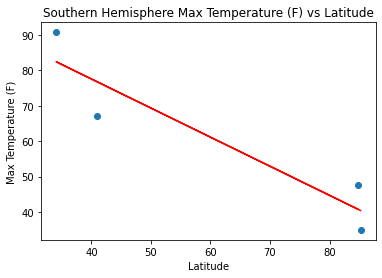

In [109]:
# Southern Hemisphere Max Temp vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Max Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere Max Temperature (F) vs Latitude')

Text(0.5, 1.0, 'Northern Hemisphere Humidity (%) vs Latitude')

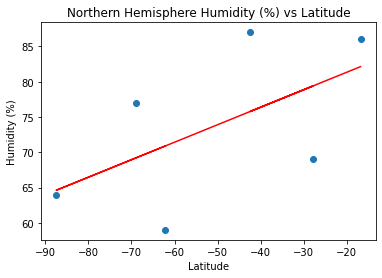

In [110]:
# Northern Hemisphere Humidity vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity (%) vs Latitude')

Text(0.5, 1.0, 'Southern Hemisphere Humidity (%) vs Latitude')

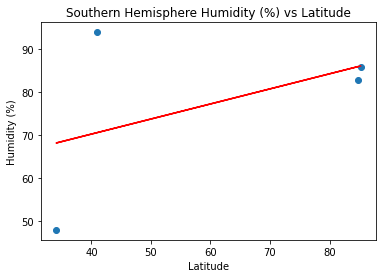

In [111]:
# Southern Hemisphere Humidity vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity (%) vs Latitude')

Text(0.5, 1.0, 'Northern Hemisphere Cloudiness (%) vs Latitude')

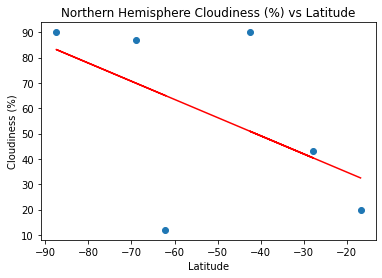

In [112]:
# Northern Hemisphere Cloudiness vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness (%) vs Latitude')

Text(0.5, 1.0, 'Southern Hemisphere Cloudiness (%) vs Latitude')

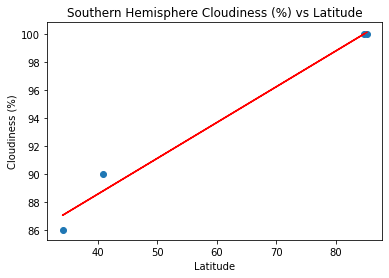

In [113]:
# Southern Hemisphere Cloudiness vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness (%) vs Latitude')

Text(0.5, 1.0, 'Northern Hemisphere Wind Speed (mph) vs Latitude')

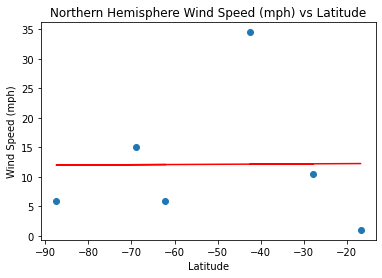

In [114]:
# Northern Hemisphere Wind Speed vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed (mph) vs Latitude')

Text(0.5, 1.0, 'Southern Hemisphere Wind Speed (mph) vs Latitude')

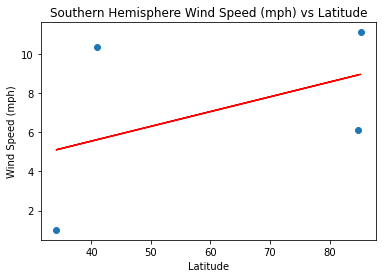

In [115]:
# Southern Hemisphere Wind Speed vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed (mph) vs Latitude')